[View in Colaboratory](https://colab.research.google.com/github/AmoDinho/Machine-Learning-Crash-Course-with-TF/blob/master/example/NYC_Taxis.ipynb)

# NYC Taxi Trip Data for 2016

The goal of this study is to try and predict the the total trip amount. We will use Tensorflow to do this. But most importantly we will use linear regression.

# Learning Objectives
* Use the LinearRefressor class in TF tp predict the number the shares based on the number of words in the content.

# Setup


In [0]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Lets load our dataset

In [0]:
df_taxi = pd.read_csv("https://storage.googleapis.com/machinelearning_datasets/tlc_yellow_trips_2016.csv", sep=",")

In [5]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
vendor_id          2000 non-null int64
passenger_count    2000 non-null int64
trip_distance      2000 non-null float64
fare_amount        2000 non-null float64
extra              2000 non-null float64
mta_tax            2000 non-null float64
tip_amount         2000 non-null float64
tolls_amount       2000 non-null float64
imp_surcharge      2000 non-null float64
total_amount       2000 non-null float64
dtypes: float64(8), int64(2)
memory usage: 156.3 KB


In [7]:
df_taxi.describe()

,vendor_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,3.0,1.0,3.1,13.5,0.4,0.5,1.2,0.4,0.3,16.4
std,0.0,0.1,3.8,12.0,1.0,0.0,3.9,1.9,0.0,14.8
min,3.0,1.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,3.3
25%,3.0,1.0,0.9,6.5,0.0,0.5,0.0,0.0,0.3,8.3
50%,3.0,1.0,1.7,9.5,0.5,0.5,0.0,0.0,0.3,11.8
75%,3.0,1.0,3.3,15.0,0.5,0.5,1.6,0.0,0.3,17.8
max,3.0,4.0,41.6,180.0,18.0,0.5,126.0,37.0,0.6,214.3


# EDA



*   Check distributions of total_amount,trip_distance, fare_amount and passenger_count
*   check the strenght between relationships.



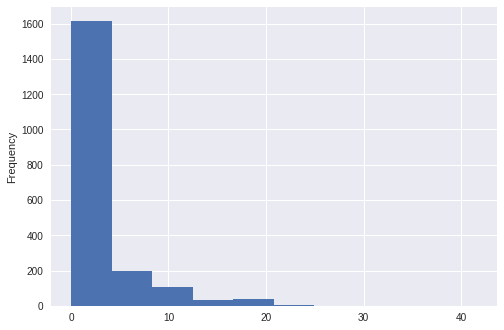

In [8]:
#lets plot some histograms
df_taxi['trip_distance'].plot(kind='hist')

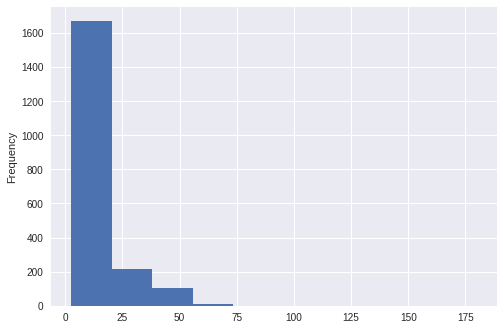

In [9]:
df_taxi['fare_amount'].plot(kind='hist')

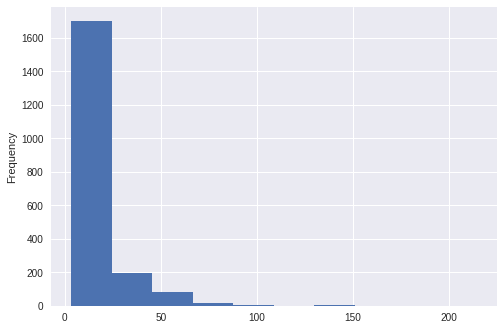

In [10]:
df_taxi['total_amount'].plot(kind='hist')

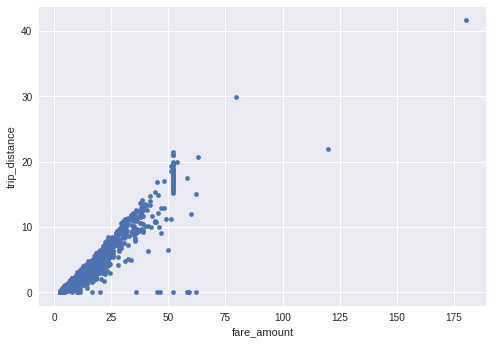

In [15]:
df_taxi.plot(kind='scatter', x='fare_amount',y='trip_distance')
plt.show()

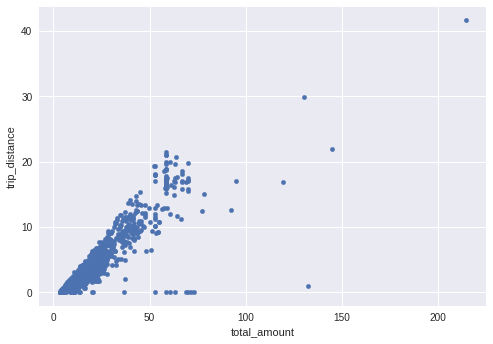

In [16]:
df_taxi.plot(kind='scatter', x='total_amount',y='trip_distance')
plt.show()

In [18]:
#Lets test correlation between variables
corr = df_taxi.corr()

corr

,vendor_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
vendor_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
passenger_count,nan,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
trip_distance,nan,0.0,1.0,0.9,0.2,0.0,0.2,0.6,0.2,0.9
fare_amount,nan,0.0,0.9,1.0,0.1,0.0,0.3,0.5,0.1,1.0
extra,nan,-0.0,0.2,0.1,1.0,-0.0,0.1,0.6,0.8,0.3
mta_tax,nan,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.4,0.0
tip_amount,nan,-0.0,0.2,0.3,0.1,0.0,1.0,0.2,0.1,0.5
tolls_amount,nan,0.0,0.6,0.5,0.6,0.0,0.2,1.0,0.6,0.6
imp_surcharge,nan,-0.0,0.2,0.1,0.8,0.4,0.1,0.6,1.0,0.3
total_amount,nan,0.0,0.9,1.0,0.3,0.0,0.5,0.6,0.3,1.0


# Data Preprocessing

# ML Pipeline